# 10과 [실습] 범주 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 다이아몬드 가격  
④ 뉴욕 공기 오염도


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


In [3]:
# 다이아몬드 가격
diamonds = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/diamonds.csv')
diamonds = diamonds.sample(3000, random_state = 2022)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
50989,0.31,Ideal,G,VS2,61.6,55.0,544,4.37,4.39,2.70
42221,0.33,Ideal,E,IF,62.1,55.0,1289,4.43,4.46,2.76
42307,0.41,Ideal,F,VVS1,62.1,57.0,1295,4.75,4.79,2.96
27207,2.02,Very Good,F,SI1,62.7,59.0,17530,7.97,8.03,5.02
22207,1.50,Good,H,VS1,63.4,59.0,10256,7.20,7.29,4.59


In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


범주별 숫자를 비교할 때 사용되는 방식은 범주별 평균 비교 입니다.  


## 2.범주 --> 숫자 : 시각화

① titanic 생존여부에 따라 나이에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

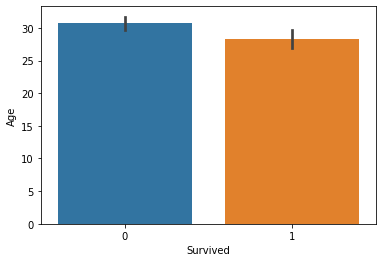

In [6]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(data=titanic, x='Survived', y='Age')
plt.show()

* 박스플롯으로 시각화 해 봅시다.

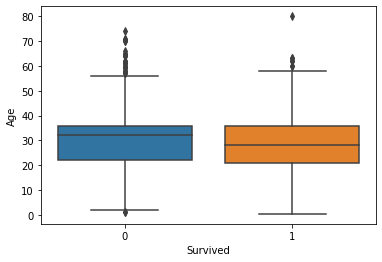

In [8]:
sns.boxplot(data=titanic, x='Survived', y='Age')
plt.show()

* 위 두 범주간에 평균에 차이가 있나요?

> 평균 차이가 있어보이진 않는다.

② titanic 성별에 따라 운임에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

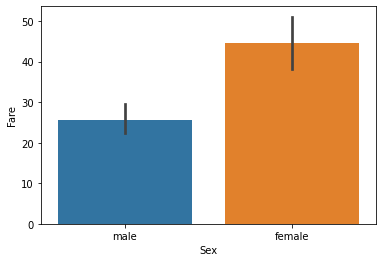

In [9]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(data=titanic, x='Sex', y='Fare')
plt.show()

* 박스플롯으로 시각화 해 봅시다.

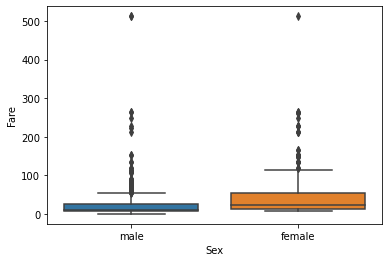

In [10]:
sns.boxplot(data=titanic, x='Sex', y='Fare')
plt.show()

* 위 범주간 평균에 차이가 있나요?

> 시각적으로 보기엔 있어보인다.

③ titanic 승선지역(Embarked)에 따라 나이에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

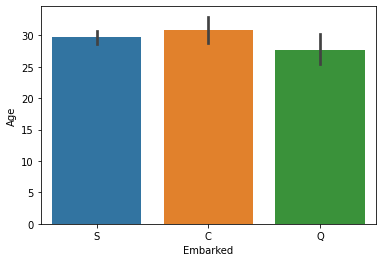

In [12]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(data=titanic, x='Embarked', y='Age')
plt.show()

* 박스플롯으로 시각화 해 봅시다.

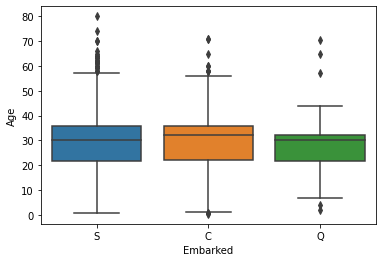

In [13]:
sns.boxplot(data=titanic, x='Embarked', y='Age')
plt.show()

* 위 범주간 평균에 차이가 있나요?

> 시각적으로 평균 차이가 있어보이진 않는다.

④ diamonds color에 따른 가격에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

In [14]:
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
50989,0.31,Ideal,G,VS2,61.6,55.0,544,4.37,4.39,2.70
42221,0.33,Ideal,E,IF,62.1,55.0,1289,4.43,4.46,2.76
42307,0.41,Ideal,F,VVS1,62.1,57.0,1295,4.75,4.79,2.96


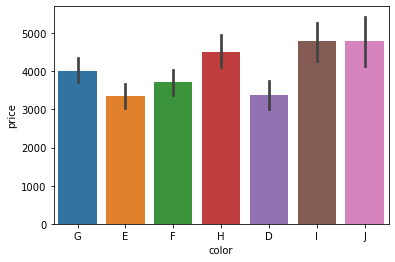

In [15]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(data=diamonds, x='color', y='price')
plt.show()

* 박스플롯으로 시각화 해 봅시다.

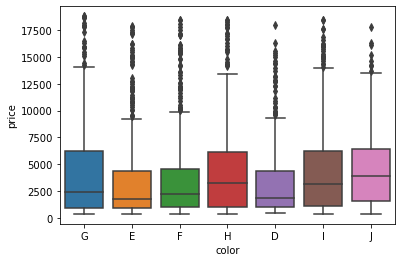

In [16]:
sns.boxplot(data=diamonds, x='color', y='price')
plt.show()

* 위 범주간 평균에 차이가 있나요?

> 시각적으로 평균 차이가 있는 것으로 보인다.

## 3.수치화 : t-test(두 범주), anova(세 범주 이상)

① titanic 생존여부에 따라 나이에 차이가 있을까요?

* t-test를 수행해 봅시다.

In [21]:
# 먼저 범주별로 데이터를 나눕시다.
died = titanic.loc[titanic['Survived']==0,'Age']
life = titanic.loc[titanic['Survived']==1,'Age']

In [22]:
# t-test를 수행
spst.ttest_ind(life,died)

Ttest_indResult(statistic=-2.6686741711011606, pvalue=0.007753857024893963)

* t-test 결과를 해석해 봅시다.

> p-value 가 0.00775 로 매우 작은 편이다. = 귀무가설 기각 / 대립가설 채택  
>   - 생존 여부에 따라 나이 차이가 있다.

② titanic 성별에 따라 운임에 차이가 있을까요?

* t-test를 수행해 봅시다.

In [24]:
# 먼저 범주별로 데이터를 나눕시다.
female = titanic.loc[titanic['Sex']=='female','Fare']
male = titanic.loc[titanic['Sex']=='male','Fare']

In [25]:
# t-test를 수행
spst.ttest_ind(female,male)

Ttest_indResult(statistic=5.529140269385719, pvalue=4.2308678700429995e-08)

* t-test 결과를 해석해 봅시다.

> p-value 가 0에 가깝다. = 귀무가설 기각 / 대립가설 채택  
>  - 성별에 따라 운임 차이가 있다.

③ titanic 승선지역(Embarked)에 따라 나이에 차이가 있을까요?

* 분산분석(anova)을 수행해 봅시다.

In [32]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
# 먼저 범주별로 데이터를 나눕시다.
S = titanic.loc[titanic['Embarked']=='S','Age']
C = titanic.loc[titanic['Embarked']=='C','Age']
Q = titanic.loc[titanic['Embarked']=='Q','Age']

In [34]:
# anova를 수행
spst.f_oneway(S,C,Q)

F_onewayResult(statistic=1.5519517205674485, pvalue=0.2124081352616724)

* anova 결과를 해석해 봅시다.

> p-value 가 0.21241 로 0.05보다 크다. = 귀무가설 채택 / 대립가설 기각
>  - 승선지역에 따른 나이 차이는 없다.

④ diamonds color에 따른 가격에 차이가 있을까요?

* 분산분석(anova)을 수행해 봅시다.

In [35]:
diamonds['color'].value_counts()

G    628
E    558
F    533
H    426
D    375
I    315
J    165
Name: color, dtype: int64

In [39]:
# 먼저 범주별로 데이터를 나눕시다.
G = diamonds.loc[diamonds['color'] == 'G','price']
E = diamonds.loc[diamonds['color'] == 'E','price']
F = diamonds.loc[diamonds['color'] == 'F','price']
H = diamonds.loc[diamonds['color'] == 'H','price']
D = diamonds.loc[diamonds['color'] == 'D','price']
I = diamonds.loc[diamonds['color'] == 'I','price']
J = diamonds.loc[diamonds['color'] == 'J','price']

In [40]:
# anova를 수행
spst.f_oneway(G,E,F,H,D,I,J)

F_onewayResult(statistic=8.748551345095594, pvalue=1.80447619297854e-09)

* anova 결과를 해석해 봅시다.

> p-value 가 0에 가깝다. = 귀무가설 기각 / 대립가설 채택
>  - color에 따른 가격 차이가 있다.  
>  - 추가 색별 차이를 보면 색마다 t-검정을 실시해야한다.